In [3]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [4]:
# reading in data and dropping useless columns
ratings = pd.read_csv('data/ratings.csv')

ratings.drop(columns='timestamp', axis=1, inplace=True)

In [5]:
# displaying dataframe
ratings.head()

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0
3,1,1221,5.0
4,1,1246,5.0


In [6]:
# reading in movies_metadata.csv
movies = pd.read_csv('data/movies_metadata.csv')

# renaming id column to movieId to match other df
movies.rename(columns=({'id':'movieId'}), inplace=True)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
import json

# deconstructing list of dictionaries to get only the values (genres)
movies['genres'] = movies['genres'].str.replace("'", '"').apply(lambda x: ','.join([_["name"] for _ in json.loads(x)]))

In [8]:
# only taking the genres, movieId, and title columns
movies = movies[['genres', 'movieId', 'title']]
movies.genres = movies.genres.str.split(',')

In [9]:
genres = pd.DataFrame(movies['genres'].tolist(), index=movies.index)
genres['movieId'] = movies['movieId']
genres['title'] = movies['title']

genres.fillna("", inplace=True)

In [10]:
genres.rename(columns={
    0:'genre_1',
    1:'genre_2',
    2:'genre_3',
    3:'genre_4',
    4:'genre_5',
    5:'genre_6',
    6:'genre_7',
    7:'genre_8'
}, inplace=True)

In [11]:
genres = genres[['movieId', 'title', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8']]

genres.head()

,movieId,title,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8
0,862,Toy Story,Animation,Comedy,Family,,,,,
1,8844,Jumanji,Adventure,Fantasy,Family,,,,,
2,15602,Grumpier Old Men,Romance,Comedy,,,,,,
3,31357,Waiting to Exhale,Comedy,Drama,Romance,,,,,
4,11862,Father of the Bride Part II,Comedy,,,,,,,


In [12]:
joined = ratings.join(genres[['title','genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8']], on='movieId')

In [13]:
# getting number of ratings per movie
rating_count = joined.groupby('movieId').count()

# geting the average rating for each movie
avg_ratings = joined.groupby('movieId').mean()['rating']

# making sure the df has only movies with greater than 30 ratings
avg_ratings = avg_ratings.loc[rating_count['rating'] > 30]

# sorting df by descending order
sorted = avg_ratings.sort_values(ascending=False)

# putting sorted into df
sort_df = pd.DataFrame(sorted)

# resetting index
sort_df = sort_df.reset_index(level=0)

# renaming and adding the avg rating column to df
sort_df['avg_rating'] = sort_df['rating']

# dropping rating column
sort_df.drop(columns='rating', inplace=True)

# display df
sort_df.head()

,movieId,avg_rating
0,159817,4.478780
1,318,4.429015
2,170705,4.394366
3,171011,4.352632
4,858,4.339811


In [14]:
# average rating for each movie df
data = sort_df.join(ratings['userId'], on='movieId')

dat_new = data.join(genres[['title', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8']], on='movieId')

dat_new = dat_new[['userId', 'movieId','title', 'avg_rating', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8']]

final = dat_new.drop(['genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8'], axis=1).fillna("")

In [15]:
final['userId'].drop_duplicates(inplace=True)

In [16]:
mIdmelt = dat_new.reset_index().pivot_table(values='avg_rating', index='userId', columns='title').fillna(0)

melt = final.reset_index().pivot_table(values='avg_rating', index='userId', columns='genre_1')

melt.fillna(0, inplace=True)
mIdmelt

title,"'night, Mother",...All the Marbles,...And God Created Woman,...And Justice for All,...tick... tick... tick...,00 Schneider - Jagd auf Nihil Baxter,1-900,10,10 Attitudes,10 Rillington Place,...,xXx,¡Three Amigos!,À Nous la Liberté,À la mode,Μαριχουάνα Στοπ !,Νόμος 4000,А поутру они проснулись,Гонгофер,Юленька,’Round Midnight
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
melt

genre_1,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,3.157710,3.448261,0.0,3.356227,3.680629,0.000000,3.350034,2.672179,0.000000,...,3.326442,0.000000,0.000000,0.0,3.236953,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,3.659013,3.999855,0.0,2.913158,3.269023,0.000000,3.436315,0.000000,3.241559,...,3.620594,0.000000,0.000000,0.0,3.888769,3.238314,0.0,0.000000,0.0,0.0
3,3.225922,4.000723,0.000000,0.0,2.657015,0.000000,0.000000,3.317939,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.965011,0.0,0.0
4,3.649109,3.103263,3.543080,0.0,3.146866,3.445937,3.506538,3.286919,3.161439,0.000000,...,0.000000,3.005345,3.337816,0.0,4.010846,0.000000,0.0,0.000000,0.0,0.0
5,2.824333,3.091570,0.000000,0.0,3.372380,2.898387,3.635135,3.391765,0.000000,3.488201,...,0.000000,0.000000,2.767378,0.0,3.270196,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,2.758427,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1815,3.613821,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1817,3.008484,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [18]:
X = melt.drop('Action', axis=1)
y = melt['Action']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [20]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 0.50661258, -0.33185642, -0.26944271, ..., -0.32373086,
        -0.21415869, -0.22437373],
       [-2.6578884 ,  2.64000431, -0.26944271, ...,  2.83790396,
         4.64449098, -0.22437373],
       [ 0.54150046,  3.1440924 ,  3.69612882, ...,  3.32551138,
        -0.21415869,  4.08036189],
       ...,
       [ 0.47515578, -0.33185642, -0.26944271, ..., -0.32373086,
        -0.21415869, -0.22437373],
       [ 0.42394598, -0.33185642, -0.26944271, ..., -0.32373086,
        -0.21415869, -0.22437373],
       [ 0.65268259, -0.33185642, -0.26944271, ..., -0.32373086,
        -0.21415869, -0.22437373]])

In [21]:
# MODEL TO PREDICT THE SCORE OF A MOVIE IN A CERTAIN GENRE (COMEDY)

num_input = 20
hl1 = 100
hl2 = 50
hl3 = 25

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=hl1, input_dim = num_input, activation='relu'))

nn.add(tf.keras.layers.Dense(units=hl2, activation='relu'))

nn.add(tf.keras.layers.Dense(units=hl3, activation='relu'))

nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________


In [22]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mse"])

In [23]:
fit_model = nn.fit(X_train_scaled, y_train,epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.7640 - mse: 1.0428
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: -2.4503 - accuracy: 0.7891 - mse: 0.8514
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: -10.8709 - accuracy: 0.7891 - mse: 0.7954
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: -45.2116 - accuracy: 0.7891 - mse: 0.7846
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: -142.6313 - accuracy: 0.7891 - mse: 0.7834
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: -411.2503 - accuracy: 0.7891 - mse: 0.7836
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: -885.0789 - accuracy: 0.7891 - mse: 0.7834
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: -1783.4437 - accuracy: 0.7891 - mse: 0.7831
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: -3238

<AxesSubplot:>

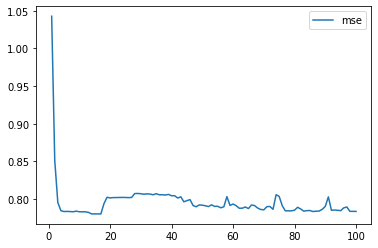

In [24]:
pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1)).plot(y="mse")

In [25]:
model_loss, model_accuracy, mean_squared_error = nn.evaluate(X_test_scaled,y_test,verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, MSE: {mean_squared_error}")

8/8 - 0s - loss: -6.2924e+07 - accuracy: 0.8117 - mse: 0.7026 - 167ms/epoch - 21ms/step
Loss: -62924292.0, Accuracy: 0.8117154836654663, MSE: 0.702597439289093


In [26]:
# MODEL TO PREDICT THE AVERAGE RATING OF A SPECIFIC MOVIE (LEGEND)

b = mIdmelt.drop('Legend', axis=1)
g = mIdmelt['Legend']

b_train, b_test, g_train, g_test = train_test_split(b, g, random_state=15)

b_train_scaled = scaler.fit_transform(b_train)
b_test_scaled = scaler.fit_transform(b_test)



num_input = 8980
hl1 = 200
hl2 = 100
hl3 = 50

mId = tf.keras.models.Sequential()

mId.add(tf.keras.layers.Dense(units=hl1, input_dim = num_input, activation='relu'))

mId.add(tf.keras.layers.Dense(units=hl2, activation='relu'))

mId.add(tf.keras.layers.Dense(units=hl3, activation='relu'))

mId.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

mId.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               1796200   
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,821,401
Trainable params: 1,821,401
Non-trainable params: 0
_________________________________________________________________


In [27]:
mId.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mse"])

In [28]:
model = mId.fit(b_train_scaled, g_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 34ms/step - loss: 0.8556 - accuracy: 0.7500 - mse: 0.2393
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: -0.6172 - accuracy: 0.9797 - mse: 0.0363
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: -1.3289 - accuracy: 0.9932 - mse: 0.0227
Epoch 4/100
5/5 [==============================] - 0s 29ms/step - loss: -2.0460 - accuracy: 0.9932 - mse: 0.0227
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: -3.5966 - accuracy: 0.9932 - mse: 0.0227
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: -4.5787 - accuracy: 0.9932 - mse: 0.0227
Epoch 7/100
5/5 [==============================] - 0s 24ms/step - loss: -7.9417 - accuracy: 0.9932 - mse: 0.0227  
Epoch 8/100
5/5 [==============================] - 0s 35ms/step - loss: -9.9731 - accuracy: 0.9932 - mse: 0.0227
Epoch 9/100
5/5 [==============================] - 0s 28ms/step - loss: -13.2957 - accuracy: 0.

In [29]:
loss, accuracy, mse = mId.evaluate(b_test_scaled,g_test,verbose=2)

print(f"Loss: {loss}, Accuracy: {accuracy}, MSE: {mse}")

2/2 - 0s - loss: 1577.9926 - accuracy: 0.3000 - mse: 0.6984 - 125ms/epoch - 62ms/step
Loss: 1577.9925537109375, Accuracy: 0.30000001192092896, MSE: 0.6984361410140991


In [30]:
from google.colab import files
melt.to_csv('non_optomized_melt.csv', encoding = 'utf-8-sig') 
files.download('non_optomized_melt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
melt.to_csv('non_optomized_mov.csv', encoding = 'utf-8-sig') 
files.download('non_optomized_mov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>